***Note: this is the Complexes.ipynb notebook. The
PDF version "Bond Graph Representation of Complexes: Bringing Graph Theory
to Bond Graphs"
is available [here](Complexes.pdf).***

# Introduction

Chemical Reaction Network theory <cite data-cite="Fei72,HorJac72,FeiHor74,SchRaoJay13,SchRaoJay15,SchRaoJay16"></cite> uses the formal concept of *complexes*.  
Complexes are the combination of chemical
species forming the substrate and products of the network reactions. In particular, the stoichiometric matrix $N$ can be decomposed as:
  $N = ZD$
where $Z$ relates complexes to species and $D$ is the *incidence matrix* of the directed graph formed by taking the
complexes to be vertices and the reactions to be edges.
This digraph can then be analysed using standard graph theory. 

This notion can be given a bond graph interpretation
<cite data-cite="GawCra18a">(Gawthrop and Crampin, 2018)</cite>. 
This notebook illustrates complexes using examples from this paper; please see the paper for further explanation.

As noted by <cite data-cite="GawCra18a">(Gawthrop and Crampin, 2018)</cite> the digraphs for systems with and without chemostats are very different and so both are shown in the following examples.
The digraphs associated with chemostats are related to bond graph pathway analysis <cite data-cite="GawCra17">(Gawthrop and Crampin, 2017)</cite>; for each of the three examples the corresponding pathways are given.

## Import some python code
The bond graph analysis uses a number of Python modules:

In [1]:
## Some useful imports
import BondGraphTools as bgt
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import IPython.display as disp

## Stoichiometric analysis
import stoich as st

## SVG bg representation conversion
import svgBondGraph as sbg

## Set quiet=False for verbose output
quiet = True

## Chemformula output
chemformula = False

# Example 1: enzyme-catalysed reaction 
The bond graph representation of the (reversible) enzyme-catalysed reaction is
<cite data-cite="GawCra18a">(Gawthrop and Crampin, 2018)</cite>:

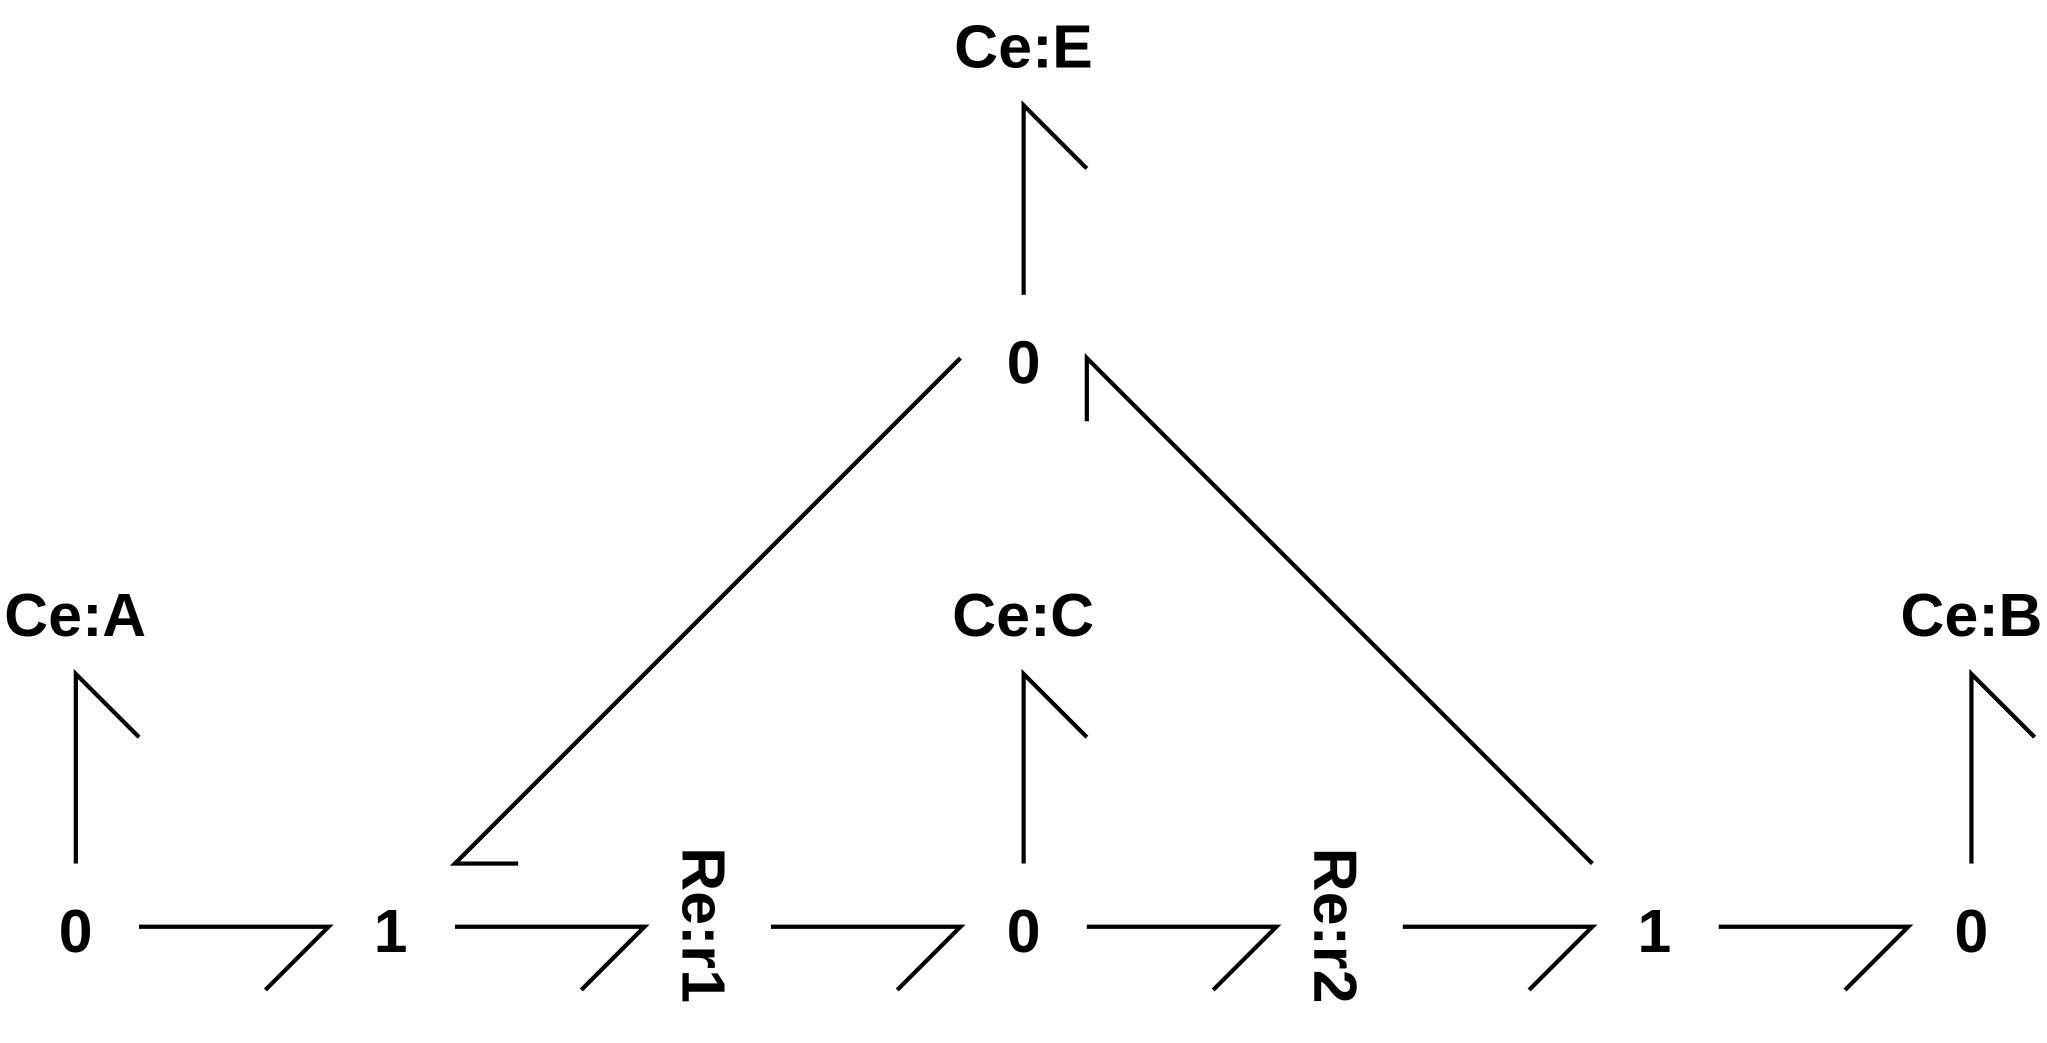

In [2]:
disp.SVG('RE_abg.svg')

This graphical representation may be converted to [bond-graph tools](https://pypi.org/project/BondGraphTools/) format using 

In [3]:
sbg.model('RE_abg.svg')
import RE_abg

{}


## Reactions
The reactions corresponding to this system are:

In [4]:
s = st.stoich(RE_abg.model(),quiet=quiet)
disp.Latex(st.sprintrl(s,chemformula=chemformula))

<IPython.core.display.Latex object>

## Stoichiometric matrix and its decomposition

In [5]:
disp.Latex(st.sprintl(s,'species'))

<IPython.core.display.Latex object>

In [6]:
disp.Latex(st.sprintl(s,'reaction'))

<IPython.core.display.Latex object>

In [7]:
disp.Latex(st.sprintl(s,'N'))

<IPython.core.display.Latex object>

In [8]:
disp.Latex(st.sprintl(s,'Z'))

<IPython.core.display.Latex object>

In [9]:
disp.Latex(st.sprintl(s,'D'))

<IPython.core.display.Latex object>

## System digraph

Complexes: ['A + E', 'C', 'B + E']


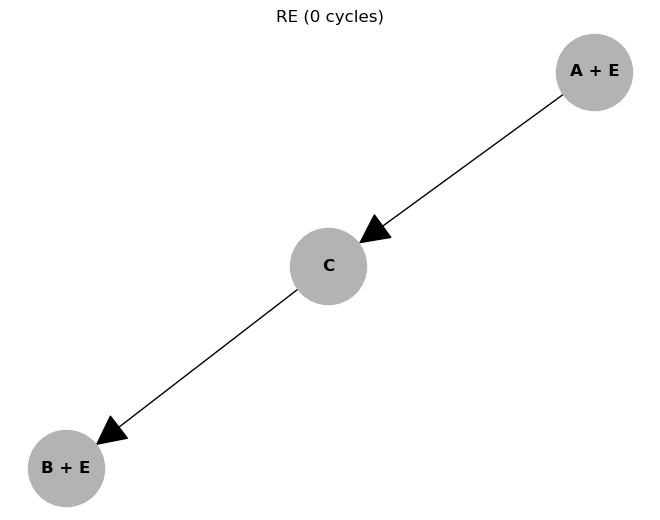

In [10]:
st.draw(s)

## System digraph (with chemostats)

Complexes: ['E', 'C']


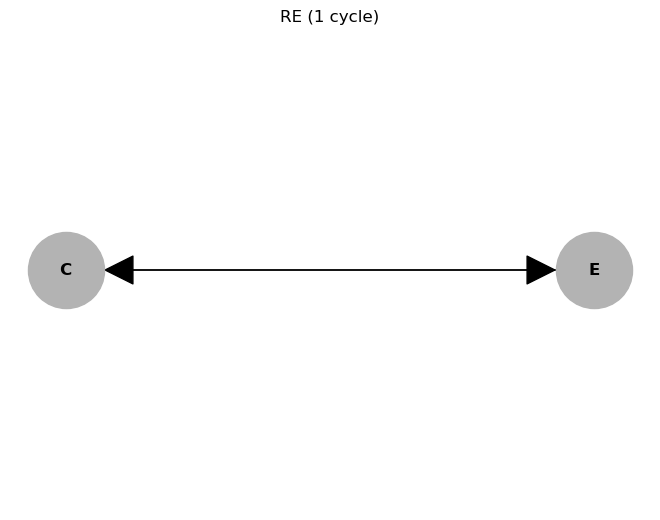

In [11]:
chemostats = ['A','B']
sc = st.statify(s,chemostats=chemostats)
st.draw(sc)

## Pathway analysis

In [12]:
sp = st.path(s,sc)
print(st.sprintp(sc))
disp.Latex(st.sprintrl(sp,chemformula=chemformula))

1 pathways
0:  + r1 + r2



<IPython.core.display.Latex object>

# Example 2: Transporter
This example looks at bond graph representation of a membrane
transporter which is discussed in detail by 
<cite data-cite="GawCra17">(Gawthrop and Crampin, 2017)</cite> and analysed by
<cite data-cite="GawCra18a">(Gawthrop and Crampin, 2018)</cite>. 

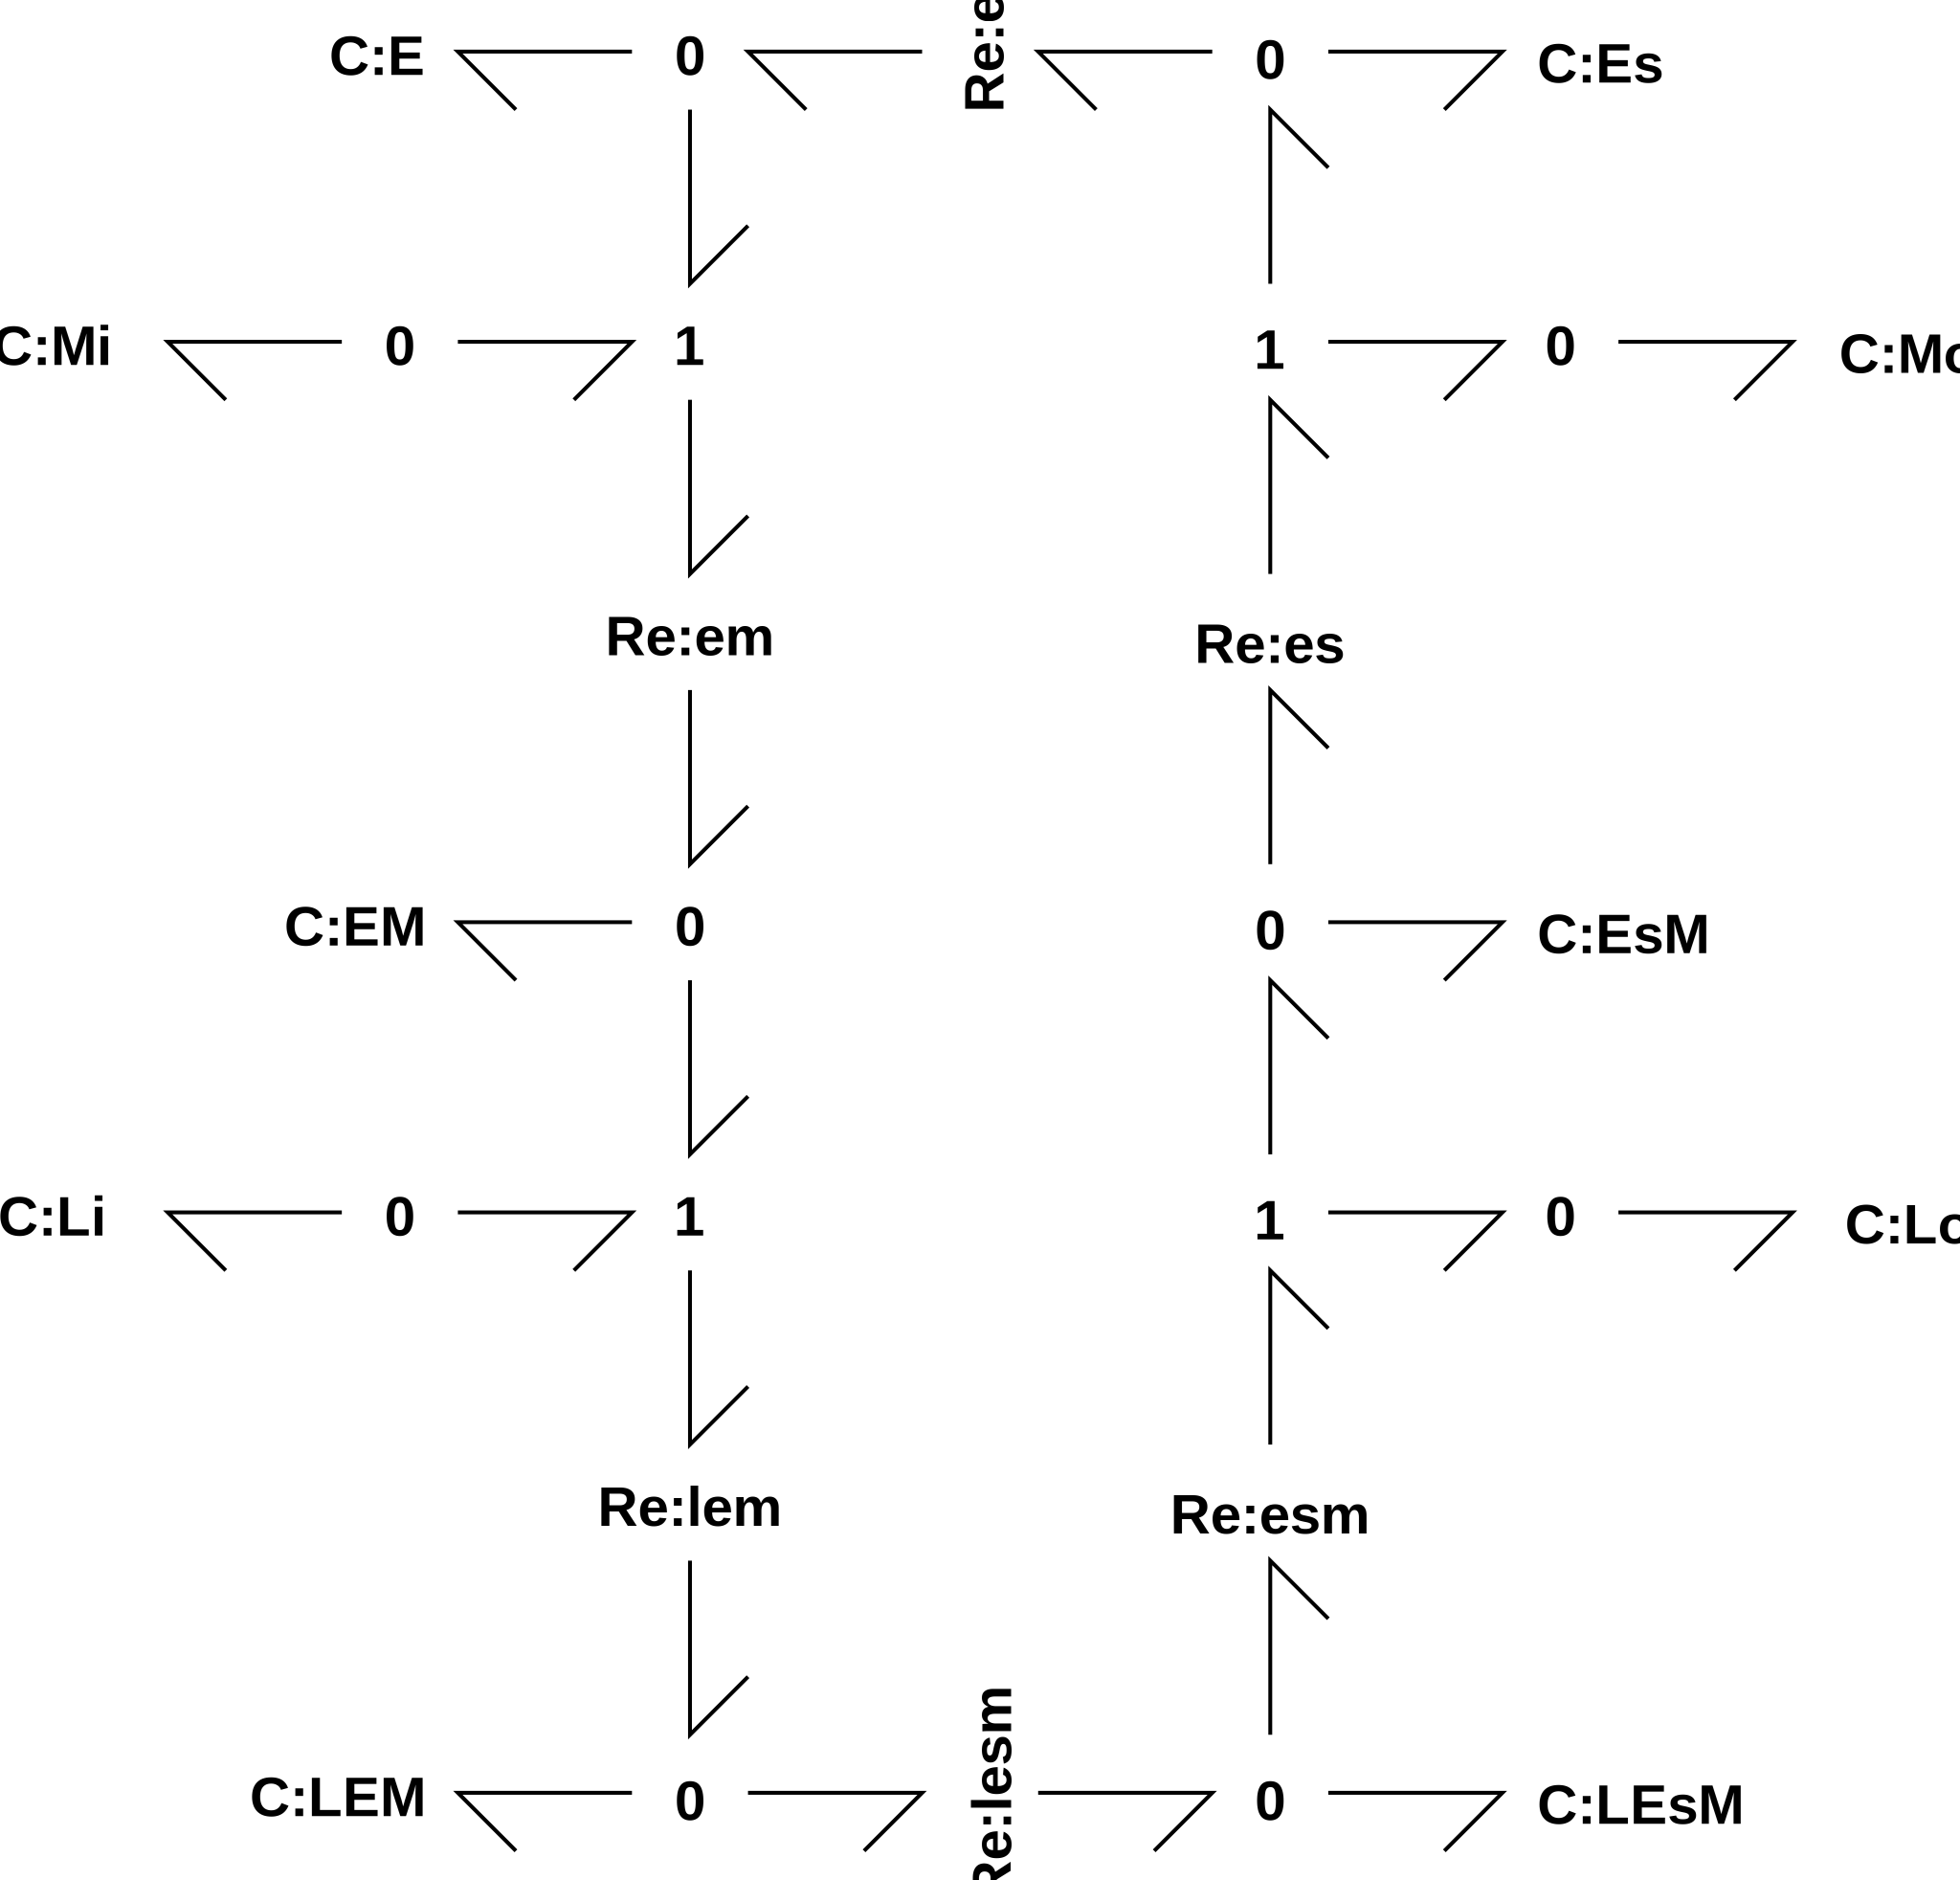

In [13]:
disp.SVG('Hill_abg.svg')

This graphical representation may be converted to [bond-graph tools](https://pypi.org/project/BondGraphTools/) format using 

In [14]:
sbg.model('Hill_abg.svg')
import Hill_abg


{}


## Reactions
The reactions corresponding to this system are:

In [15]:
s = st.stoich(Hill_abg.model(),quiet=quiet)
disp.Latex(st.sprintrl(s,chemformula=chemformula))

<IPython.core.display.Latex object>

## Stoichiometric matrix and its decomposition

In [16]:
disp.Latex(st.sprintl(s,'species'))

<IPython.core.display.Latex object>

In [17]:
disp.Latex(st.sprintl(s,'reaction'))

<IPython.core.display.Latex object>

In [18]:
disp.Latex(st.sprintl(s,'N'))

<IPython.core.display.Latex object>

In [19]:
disp.Latex(st.sprintl(s,'Z'))

<IPython.core.display.Latex object>

In [20]:
disp.Latex(st.sprintl(s,'D'))

<IPython.core.display.Latex object>

## System digraph

Complexes: ['Es', 'E + Mi', 'EsM', 'LEsM', 'EM + Li', 'LEM', 'E', 'EM', 'Es + Mo', 'EsM + Lo']


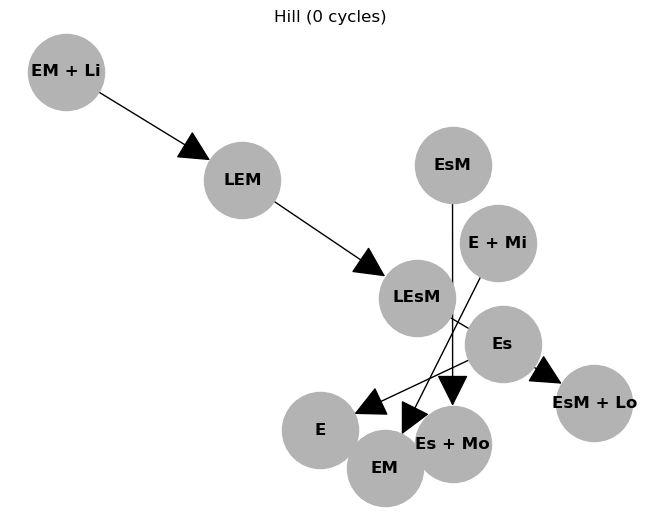

In [21]:
st.draw(s)

## System digraph (with chemostats)

Complexes: ['Es', 'E', 'EsM', 'LEsM', 'EM', 'LEM']


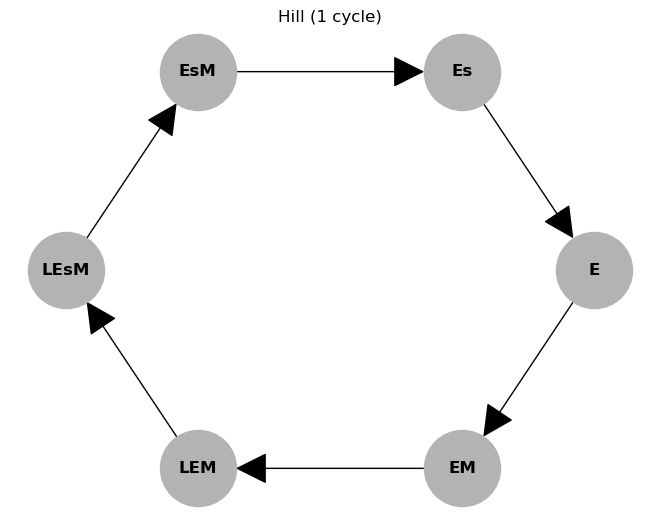

In [22]:
chemostats = ['Mi','Mo','Li','Lo']
sc = st.statify(s,chemostats=chemostats)
st.draw(sc)

## Pathway analysis

In [23]:
sp = st.path(s,sc)
print(st.sprintp(sc))
disp.Latex(st.sprintrl(sp,chemformula=chemformula))

1 pathways
0:  + e + em + es + esm + lem + lesm



<IPython.core.display.Latex object>

# Example 3: Transporter with slippage

{}


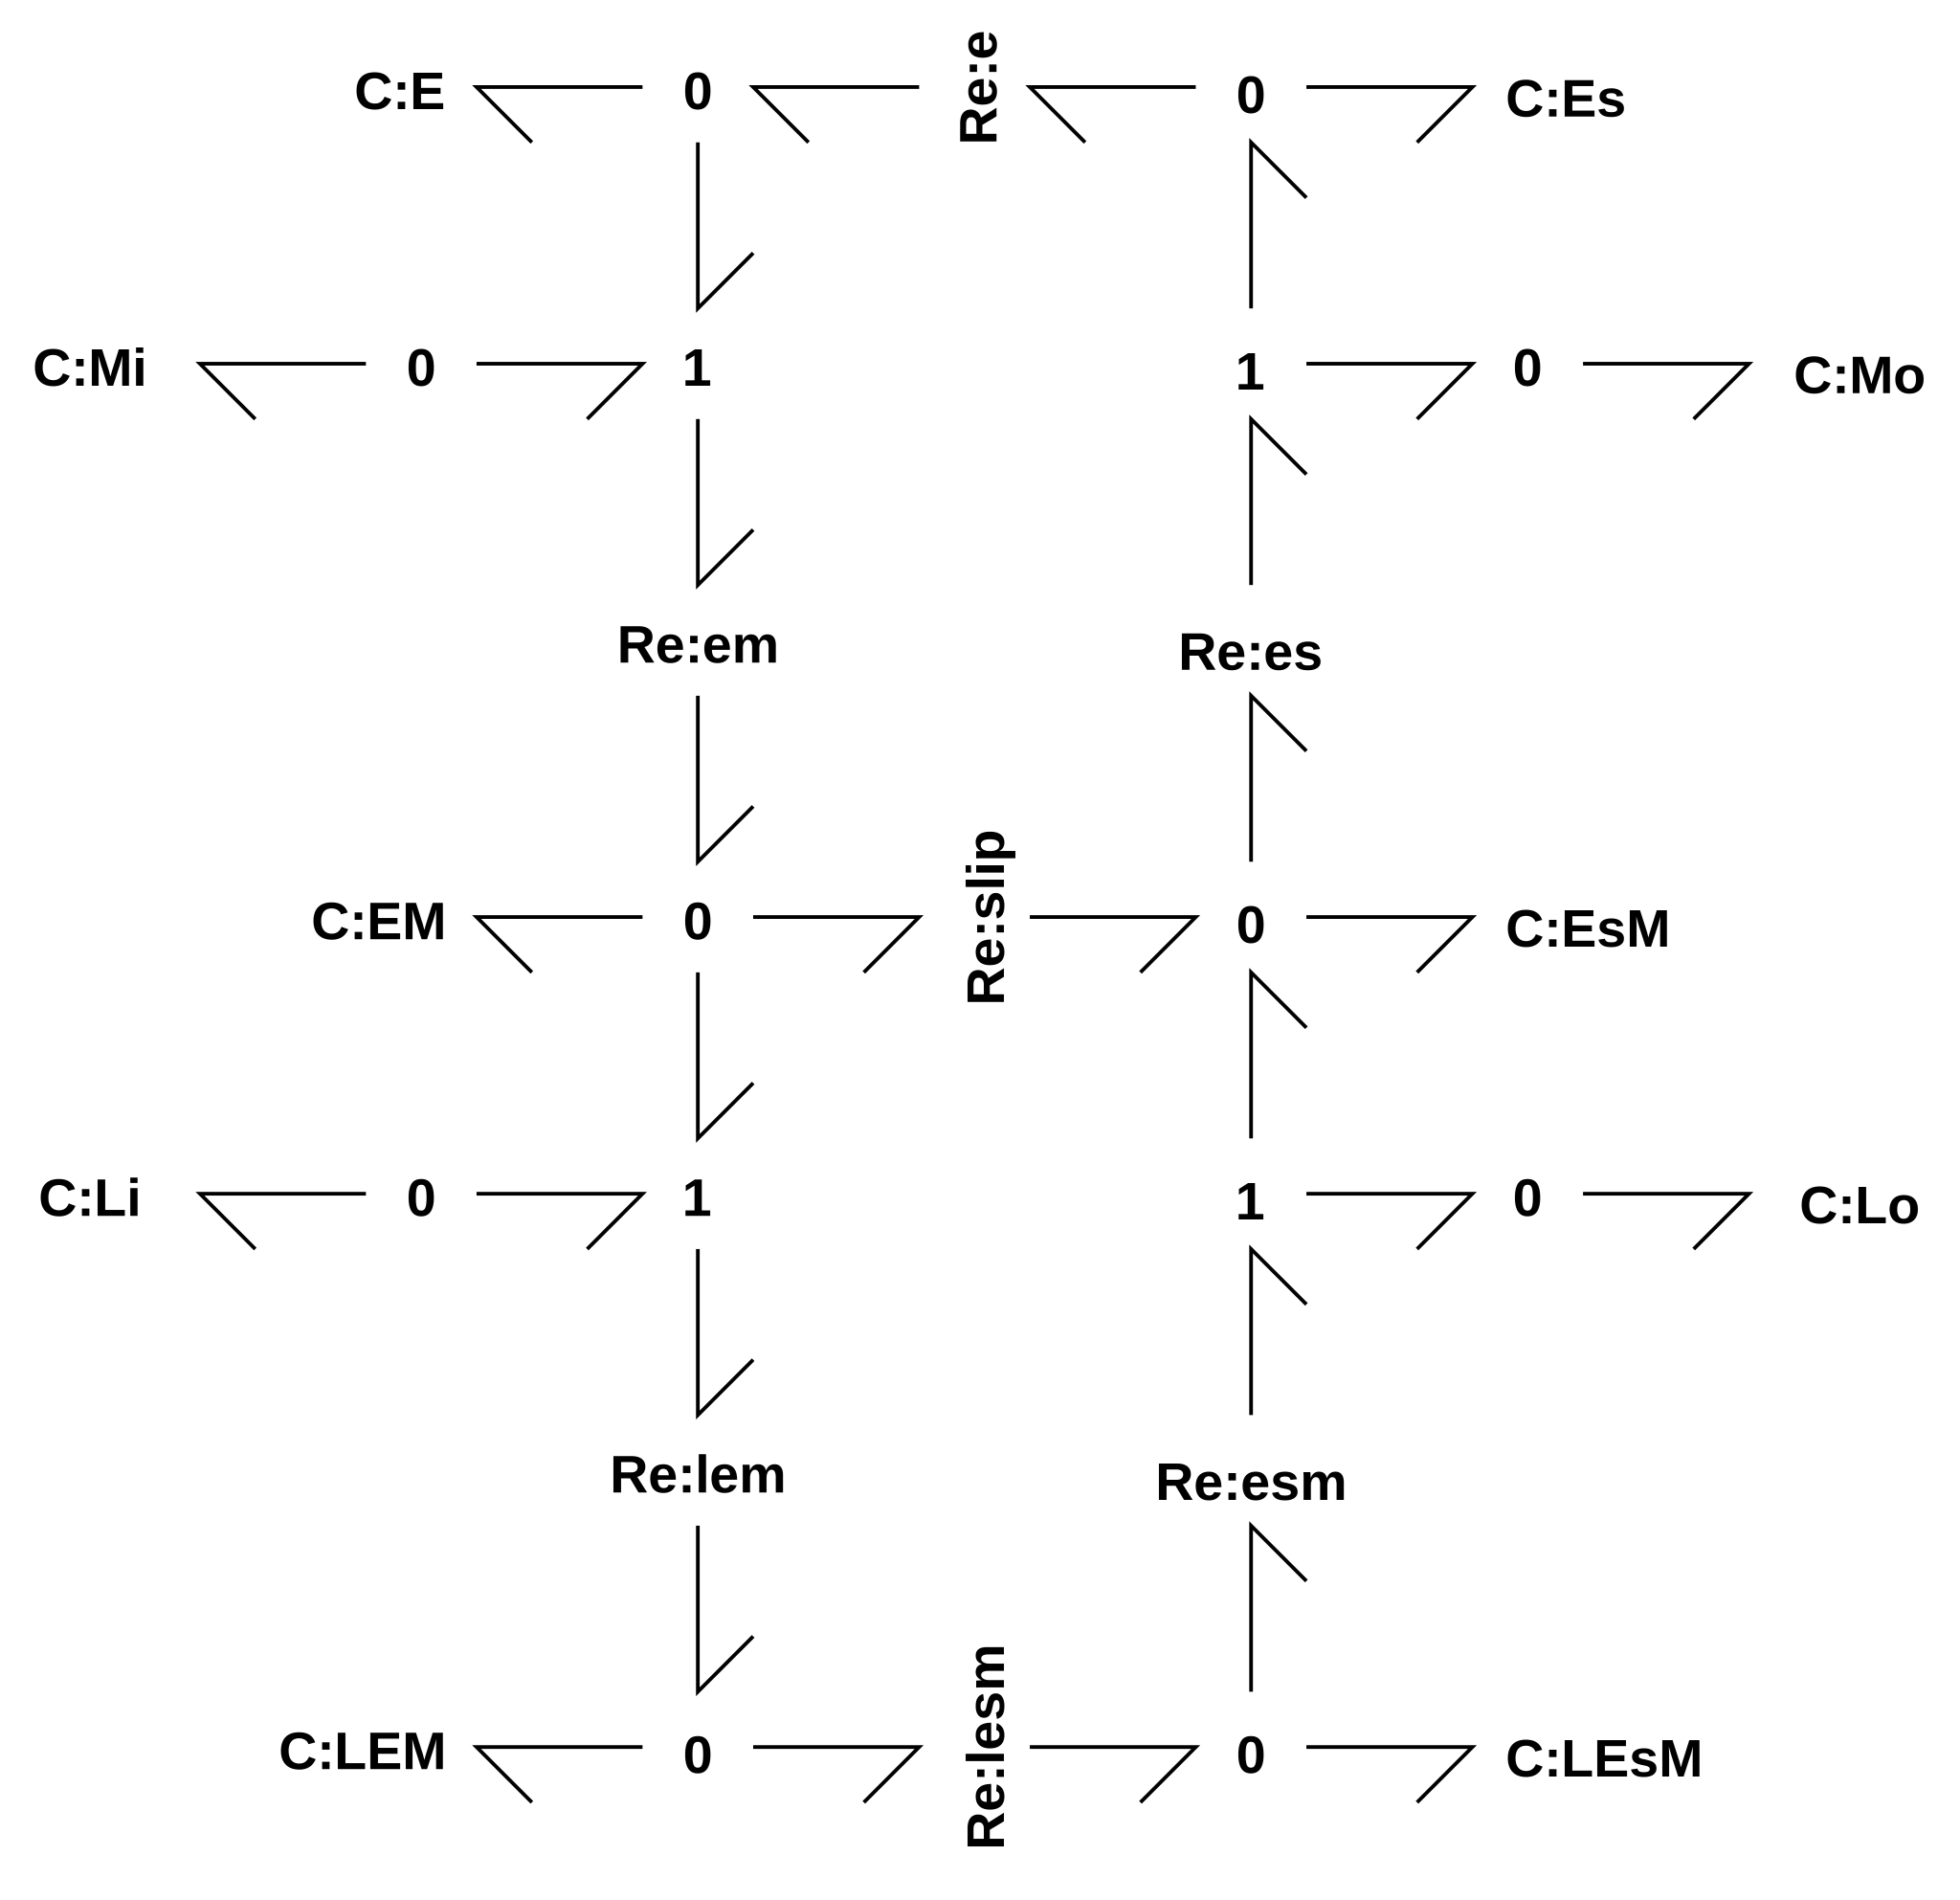

In [24]:
sbg.model('Hills_abg.svg')
import Hills_abg
disp.SVG('Hills_abg.svg')

## Reactions
The reactions corresponding to this system are:

In [25]:
s = st.stoich(Hills_abg.model(),quiet=quiet)
disp.Latex(st.sprintrl(s,chemformula=chemformula))

<IPython.core.display.Latex object>

## System digraph (with chemostats)

Complexes: ['Es', 'E', 'EsM', 'LEsM', 'EM', 'LEM']


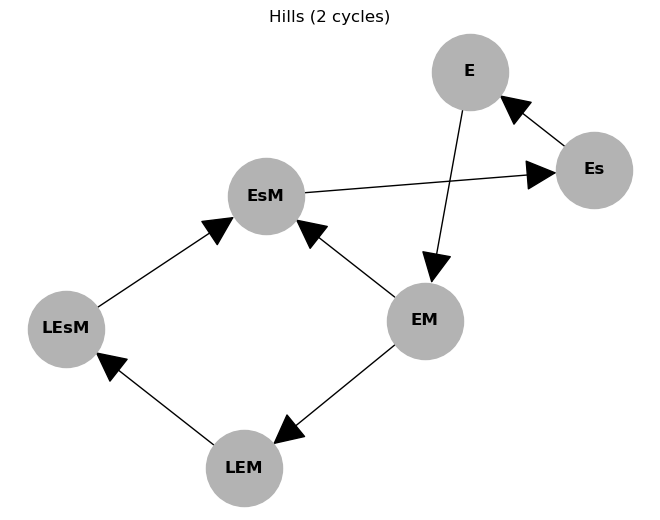

In [26]:
chemostats = ['Mi','Mo','Li','Lo']
sc = st.statify(s,chemostats=chemostats)
st.draw(sc)

## Pathway analysis

In [27]:
sp = st.path(s,sc)
print(st.sprintp(sc))
disp.Latex(st.sprintrl(sp,chemformula=chemformula))

2 pathways
0:  + e + em + es + esm + lem + lesm
1:  + e + em + es + slip



<IPython.core.display.Latex object>